In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import pandas as pd

In [3]:
origin=pd.read_csv('영상정보_입짧은햇님(200개).csv',encoding='cp949')
origin['view']=origin['view'].str.replace('조회수','')
origin['view']=origin['view'].str.replace('회','')
origin['view']=origin['view'].str.replace(',','')

In [4]:
origin['like']=origin['like'].str.replace('천','00')
origin['like']=origin['like'].str.replace('만','000')
origin['like']=origin['like'].str.replace('.','')

In [5]:
origin['comment']=origin['comment'].str.replace('댓글','')
origin['comment']=origin['comment'].str.replace('개','')
origin['comment']=origin['comment'].str.replace(',','')
hatnimdata=origin
hatnimdata

,title,view,like,unlike,comment,date
0,"마가린 + 식빵 + 설탕 20201215/Mukbang, eating show",48844,1200,48,106,2020. 12. 15.
1,"봉추찜닭에 순살찜닭이~?! 20201215/Mukbang, eating show",47903,1300,47,119,2020. 12. 15.
2,"신상을 먹어 보았어요! 교촌리얼후라이드2020/Mukbang, eating show",201572,3200,92,224,2020. 12. 14.
3,"다 먹지 못한 알찜과 알탕 ㅠㅡㅠ 20201214/Mukbang, eating show",124078,2200,77,199,2020. 12. 14.
4,[ENG] 방송 5주년 기념 갈비찜과 케이크 먹방편~! /20201207방송 편집버전,132010,2600,59,143,2020. 12. 13.
...,...,...,...,...,...,...
195,믿고먹는 햇님픽!! 닭갈비와 새우볶음밥 후식 와플까지 먹방~! /20200629방송,128496,1900,87,143,2020. 7. 3.
196,4년 만에 돌아온 햇님표 스크램블 에그 먹방~!! 20200702/Mukbang,274830,300,123,185,2020. 7. 2.
197,"시원하게 육전냉면과 명태육전보쌈 모듬전 먹방~!! 20200702/Mukbang, ...",119768,1900,81,66,2020. 7. 2.
198,치과 다녀와서 오늘은 빵만 먹겠습니다 20200701/Mukbang,287341,3500,122,226,2020. 7. 1.


In [6]:
hatnimdata['view'] = hatnimdata['view'].astype('float64')
hatnimdata['view'].mean()

358874.98

In [7]:
hatnimdata['view'] = hatnimdata['view'].astype('float64')
hatnimdata['like'] = hatnimdata['like'].astype('float64')
hatnimdata['unlike'] = hatnimdata['unlike'].astype('float64')
hatnimdata['comment'] = hatnimdata['comment'].astype('float64')

In [8]:
heat = hatnimdata[['view','like','unlike','comment']].corr()

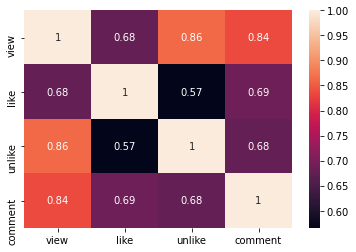

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
sns.heatmap(heat,annot=True)

In [12]:
hatnimdata

,title,view,like,unlike,comment,date
0,"마가린 + 식빵 + 설탕 20201215/Mukbang, eating show",48844.0,1200.0,48.0,106.0,2020. 12. 15.
1,"봉추찜닭에 순살찜닭이~?! 20201215/Mukbang, eating show",47903.0,1300.0,47.0,119.0,2020. 12. 15.
2,"신상을 먹어 보았어요! 교촌리얼후라이드2020/Mukbang, eating show",201572.0,3200.0,92.0,224.0,2020. 12. 14.
3,"다 먹지 못한 알찜과 알탕 ㅠㅡㅠ 20201214/Mukbang, eating show",124078.0,2200.0,77.0,199.0,2020. 12. 14.
4,[ENG] 방송 5주년 기념 갈비찜과 케이크 먹방편~! /20201207방송 편집버전,132010.0,2600.0,59.0,143.0,2020. 12. 13.
...,...,...,...,...,...,...
195,믿고먹는 햇님픽!! 닭갈비와 새우볶음밥 후식 와플까지 먹방~! /20200629방송,128496.0,1900.0,87.0,143.0,2020. 7. 3.
196,4년 만에 돌아온 햇님표 스크램블 에그 먹방~!! 20200702/Mukbang,274830.0,300.0,123.0,185.0,2020. 7. 2.
197,"시원하게 육전냉면과 명태육전보쌈 모듬전 먹방~!! 20200702/Mukbang, ...",119768.0,1900.0,81.0,66.0,2020. 7. 2.
198,치과 다녀와서 오늘은 빵만 먹겠습니다 20200701/Mukbang,287341.0,3500.0,122.0,226.0,2020. 7. 1.


In [13]:
#한글 형태소 분석기인 konlpy사용 
#이때 konlpy에는 hannanum, kommoran, kkma, twitter이 있는데 해당 분석에서는 kkma사용
from konlpy.tag import Kkma
from konlpy.tag import Mecab
from konlpy.tag import Twitter
#apply lambda사용
from konlpy.tag import Komoran
import re

In [14]:
#이모티콘 제거
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#분석에 어긋나는 불용어구 제외 (특수문자, 의성어)
han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')

In [15]:
title_ls=[]
for i in range(len(hatnimdata)):
    a = re.sub(emoji_pattern,'',hatnimdata['title'].iloc[i])
    
    b = re.sub(han,'',a)
    
    title_ls.append(b)
    
hatnimdata['title']=title_ls

In [16]:
hatnimdata

,title,view,like,unlike,comment,date
0,마가린 + 식빵 + 설탕 20201215/Mukbang eating show,48844.0,1200.0,48.0,106.0,2020. 12. 15.
1,봉추찜닭에 순살찜닭이 20201215/Mukbang eating show,47903.0,1300.0,47.0,119.0,2020. 12. 15.
2,신상을 먹어 보았어요 교촌리얼후라이드2020/Mukbang eating show,201572.0,3200.0,92.0,224.0,2020. 12. 14.
3,다 먹지 못한 알찜과 알탕 20201214/Mukbang eating show,124078.0,2200.0,77.0,199.0,2020. 12. 14.
4,[ENG] 방송 5주년 기념 갈비찜과 케이크 먹방편 /20201207방송 편집버전,132010.0,2600.0,59.0,143.0,2020. 12. 13.
...,...,...,...,...,...,...
195,믿고먹는 햇님픽 닭갈비와 새우볶음밥 후식 와플까지 먹방 /20200629방송,128496.0,1900.0,87.0,143.0,2020. 7. 3.
196,4년 만에 돌아온 햇님표 스크램블 에그 먹방 20200702/Mukbang,274830.0,300.0,123.0,185.0,2020. 7. 2.
197,시원하게 육전냉면과 명태육전보쌈 모듬전 먹방 20200702/Mukbang eati...,119768.0,1900.0,81.0,66.0,2020. 7. 2.
198,치과 다녀와서 오늘은 빵만 먹겠습니다 20200701/Mukbang,287341.0,3500.0,122.0,226.0,2020. 7. 1.


In [17]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [18]:
kkma = Kkma()

In [19]:
#영상제목 토큰화 하는 과정
noun_final = []
for text in range(len(hatnimdata)):
    noun0=kkma.pos(hatnimdata['title'].iloc[text])
    noun=[]
    for i,j in noun0:
        if j=='NNG':
            if i == '방송' or i=='편집' or i=='버전' or i=='방편' or i=='햇님':
                pass
            else:
                noun.append(i)
    noun_final.append(noun)
hatnimdata['token'] = noun_final

# 토큰화 작업을 거친 뒤에 단어가 하나인 것은 제외하기
noun_ls = []
for i in range(len(hatnimdata)):
    noun_ls0=[]
    for j in range(len(hatnimdata['token'].iloc[i])):
        if len(hatnimdata['token'].iloc[i][j]) == 1:
            pass
        else:
            noun_ls0.append(hatnimdata['token'].iloc[i][j])
    noun_ls.append(list(set(noun_ls0))) #중복제거

In [22]:
hatnimdata['token2'] = noun_ls
pd.set_option('display.max_rows', 200) 
hatnimdata['token2']

0                               [식빵, 설탕, 마가린]
1                                        [봉추]
2                            [후라, 신상, 이드, 리얼]
3                                          []
4                              [케이크, 갈비찜, 기념]
5                                        [갈래]
6                            [코카콜라, 맥도날드, 광고]
7                                        [후식]
8                         [회덮밥, 매운탕, 자연산, 메기]
9                                  [생크림, 케이크]
10                              [닭볶음, 치킨, 크림]
11                             [생크림, 케이크, 딸기]
12                              [특집, 갈비찜, 엄마]
13                                   [갈래, 라면]
14                        [케이크, 볶음밥, 깍두기, 대창]
15                                  [박기원, 수능]
16                                       [전전]
17                                         []
18                             [케이크, 바게트, 파리]
19                             [깍두기, 볶음밥, 대창]
20                                 [특집, 샌드위치]
21                                

In [38]:
hatnimdata

,title,view,like,unlike,comment,date,token,token2
0,마가린 + 식빵 + 설탕 20201215/Mukbang eating show,48844.0,1200.0,48.0,106.0,2020. 12. 15.,"[마가린, 식빵, 설탕]","[식빵, 설탕, 마가린]"
1,봉추찜닭에 순살찜닭이 20201215/Mukbang eating show,47903.0,1300.0,47.0,119.0,2020. 12. 15.,"[봉추, 찜, 닭, 순, 살, 찜, 닭]",[봉추]
2,신상을 먹어 보았어요 교촌리얼후라이드2020/Mukbang eating show,201572.0,3200.0,92.0,224.0,2020. 12. 14.,"[신상, 교, 촌, 리얼, 후라, 이드]","[후라, 신상, 이드, 리얼]"
3,다 먹지 못한 알찜과 알탕 20201214/Mukbang eating show,124078.0,2200.0,77.0,199.0,2020. 12. 14.,"[알, 찜, 탕]",[]
4,[ENG] 방송 5주년 기념 갈비찜과 케이크 먹방편 /20201207방송 편집버전,132010.0,2600.0,59.0,143.0,2020. 12. 13.,"[기념, 갈비찜, 케이크, 먹]","[케이크, 갈비찜, 기념]"
5,[ENG] 라면 먹고 갈래 먹방편 /20201206방송 편집버전,231710.0,3700.0,100.0,262.0,2020. 12. 12.,"[갈래, 먹]",[갈래]
6,(광고예용)맥도날드와 코카콜라 먹방 20201203/Mukbang eating show,209414.0,3500.0,126.0,245.0,2020. 12. 11.,"[광고, 예, 용, 맥도날드, 코카콜라, 먹, 방]","[코카콜라, 맥도날드, 광고]"
7,안 취했습니다 후식 크로플 먹방 20201210/Mukbang eating show,292931.0,400.0,94.0,334.0,2020. 12. 10.,"[후식, 먹, 방]",[후식]
8,자연산 막회와 과메기 먹방 회덮밥에 매운탕까지 20201210/Mukbang ea...,225949.0,3600.0,108.0,311.0,2020. 12. 10.,"[자연산, 회, 과, 메기, 먹, 방, 회덮밥, 매운탕]","[회덮밥, 매운탕, 자연산, 메기]"
9,'한스' 딸기 생크림 케이크20201209/Mukbang eating show,135556.0,200.0,54.0,145.0,2020. 12. 9.,"[생크림, 케이크]","[생크림, 케이크]"


In [40]:
WebData=hatnimdata.drop('token',axis=1)
WebData.to_csv('Hatnim.csv',encoding='cp949')

In [19]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(hatnimdata)):
    insert_data = pd.DataFrame({'token':hatnimdata['token2'].iloc[i]})
    insert_data['view'] = hatnimdata['view'].iloc[i]
    
    token_df = token_df.append(insert_data)
token_df['view'] = token_df['view'].astype('float64')
token_df2 = token_df.groupby('token')['view'].sum().reset_index()
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['view'].tolist()
view_count = []
for i in range(len(token_df2)):
    a = token_df2['view'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['view_count'] = view_count
token_df2.sort_values(by='count',ascending=False).head(15)

,token,view,count,view_count
282,후식,7645109.0,25,305804.360000
242,케이크,6802597.0,23,295765.086957
75,라면,5225370.0,10,522537.000000
73,떡볶이,5325323.0,10,532532.300000
20,광고,2133663.0,10,213366.300000
17,곱창,4023394.0,9,447043.777778
0,가게,3870790.0,9,430087.777778
260,특집,3399236.0,8,424904.500000
238,치즈,3376583.0,8,422072.875000
270,피자,2753300.0,7,393328.571429


In [20]:
token_df = pd.DataFrame({'token':[]})
for i in range(len(hatnimdata)):
    insert_data = pd.DataFrame({'token':hatnimdata['token2'].iloc[i]})
    insert_data['like'] = hatnimdata['like'].iloc[i]
    
    token_df = token_df.append(insert_data)
token_df = token_df[token_df['like']!='좋아요']
token_df['like'] = token_df['like'].astype('float64')
token_df2 = token_df.groupby('token')['like'].sum().reset_index()
token_df2['count'] = token_df.groupby(['token']).count().reset_index()['like'].tolist()
view_count = []
for i in range(len(token_df2)):
    a = token_df2['like'].iloc[i]/token_df2['count'].iloc[i]
    view_count.append(a)
token_df2['like_count'] = view_count
token_df2.sort_values(by='like_count',ascending=False).head(15)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,token,like,count,like_count
114,발라드,18000.0,1,18000.0
170,식사,18000.0,1,18000.0
32,김밥,24300.0,2,12150.0
103,무엇,12000.0,1,12000.0
24,교수,12000.0,1,12000.0
117,백지,20400.0,2,10200.0
240,친구,9800.0,1,9800.0
199,일기,9800.0,1,9800.0
143,생일,9500.0,1,9500.0
23,광희,9400.0,1,9400.0


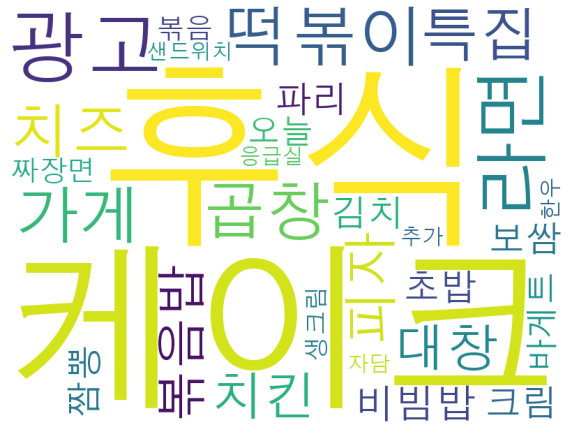

In [21]:
from collections import Counter
from wordcloud import WordCloud
#import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/H2GTRM.ttf'

font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family



noun_list = []
for i in range(len(hatnimdata)):
    for j in range(len(hatnimdata['token2'].iloc[i])):
        noun_list.append(hatnimdata['token2'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(30)
#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})

#wordcloud
wc = WordCloud(font_path=font_fname,background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [23]:
vec = []
for i in range(len(hatnimdata)):
    vec2 = []
    tm_ls = hatnimdata['token2'].iloc[i]
    if len(tm_ls) == 0: #비어있는 리스트 삭제
        pass
    else:
        for j in range(len(tm_ls)): #비어있지 않은 리스트 중에서 단어가 한 음절인 것은 pass
            if len(tm_ls[j]) > 1:
                vec2.append(tm_ls[j])
            else:
                pass
    if len(vec2) == 0:
        pass
    else:
        vec.append(vec2)

In [24]:
from gensim.models.word2vec import Word2Vec
import ast
import logging

In [35]:
vec

[['식빵', '마가린', '설탕'],
 ['봉추'],
 ['리얼', '이드', '신상', '후라'],
 ['케이크', '갈비찜', '기념'],
 ['갈래'],
 ['맥도날드', '코카콜라', '광고'],
 ['후식'],
 ['매운탕', '자연산', '메기', '회덮밥'],
 ['케이크', '생크림'],
 ['치킨', '크림', '닭볶음'],
 ['케이크', '생크림', '딸기'],
 ['갈비찜', '특집', '엄마'],
 ['라면', '갈래'],
 ['볶음밥', '케이크', '대창', '깍두기'],
 ['박기원', '수능'],
 ['전전'],
 ['바게트', '케이크', '파리'],
 ['볶음밥', '대창', '깍두기'],
 ['샌드위치', '특집'],
 ['돈까스', '점심'],
 ['오늘'],
 ['분식', '처음'],
 ['직원', '분석', '그림'],
 ['일기', '친구'],
 ['기가', '백설'],
 ['가양', '칼국수'],
 ['킹크', '랍스터'],
 ['나도', '광고', '공장'],
 ['짜장면'],
 ['대창', '곱창', '교수'],
 ['처음', '사과', '판매', '이름', '세트'],
 ['칼국수'],
 ['케이크', '체리'],
 ['킹크', '라면'],
 ['사과', '농가'],
 ['호떡', '크림', '짬뽕'],
 ['보쌈', '통돼지', '김치'],
 ['광고', '음식'],
 ['호떡', '햄버거'],
 ['크림', '짬뽕'],
 ['짜장면'],
 ['수육', '김장', '김치'],
 ['피자', '반올림', '스틱'],
 ['제품', '광고'],
 ['곱창', '전골'],
 ['한우'],
 ['슈퍼', '추억'],
 ['초밥'],
 ['바게트', '케이크', '파리'],
 ['가게', '라면', '종합'],
 ['비빔'],
 ['후식', '떡볶이', '응급실'],
 ['돼지', '반건조', '크루', '장어', '민물', '콩나물', '치기', '상식', '광고'],
 ['비빔밥'],
 ['간식'],
 ['참치'

In [25]:
model = Word2Vec(vec, min_count=3,window=3,iter=20, size=100, sg=1) #skip-gram

In [53]:
yusa=model.most_similar('후식')

<ipython-input-53-6b7748336801>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  yusa=model.most_similar('후식')


In [60]:
y=[]
x=[]
for i,j in yusa[:5]:
    y.append(j)
    x.append(i)
y

[0.2986394166946411,
 0.2360585480928421,
 0.1998552680015564,
 0.08530501276254654,
 0.07440923154354095]

<BarContainer object of 5 artists>

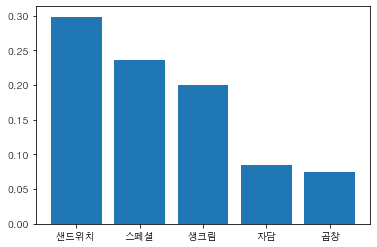

In [61]:
plt.bar(x,y)

In [27]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

path_gothic = 'C:/Windows/Fonts/H2GTRM.ttf'
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [28]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

<ipython-input-28-b8fca6fd9b3d>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


In [29]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

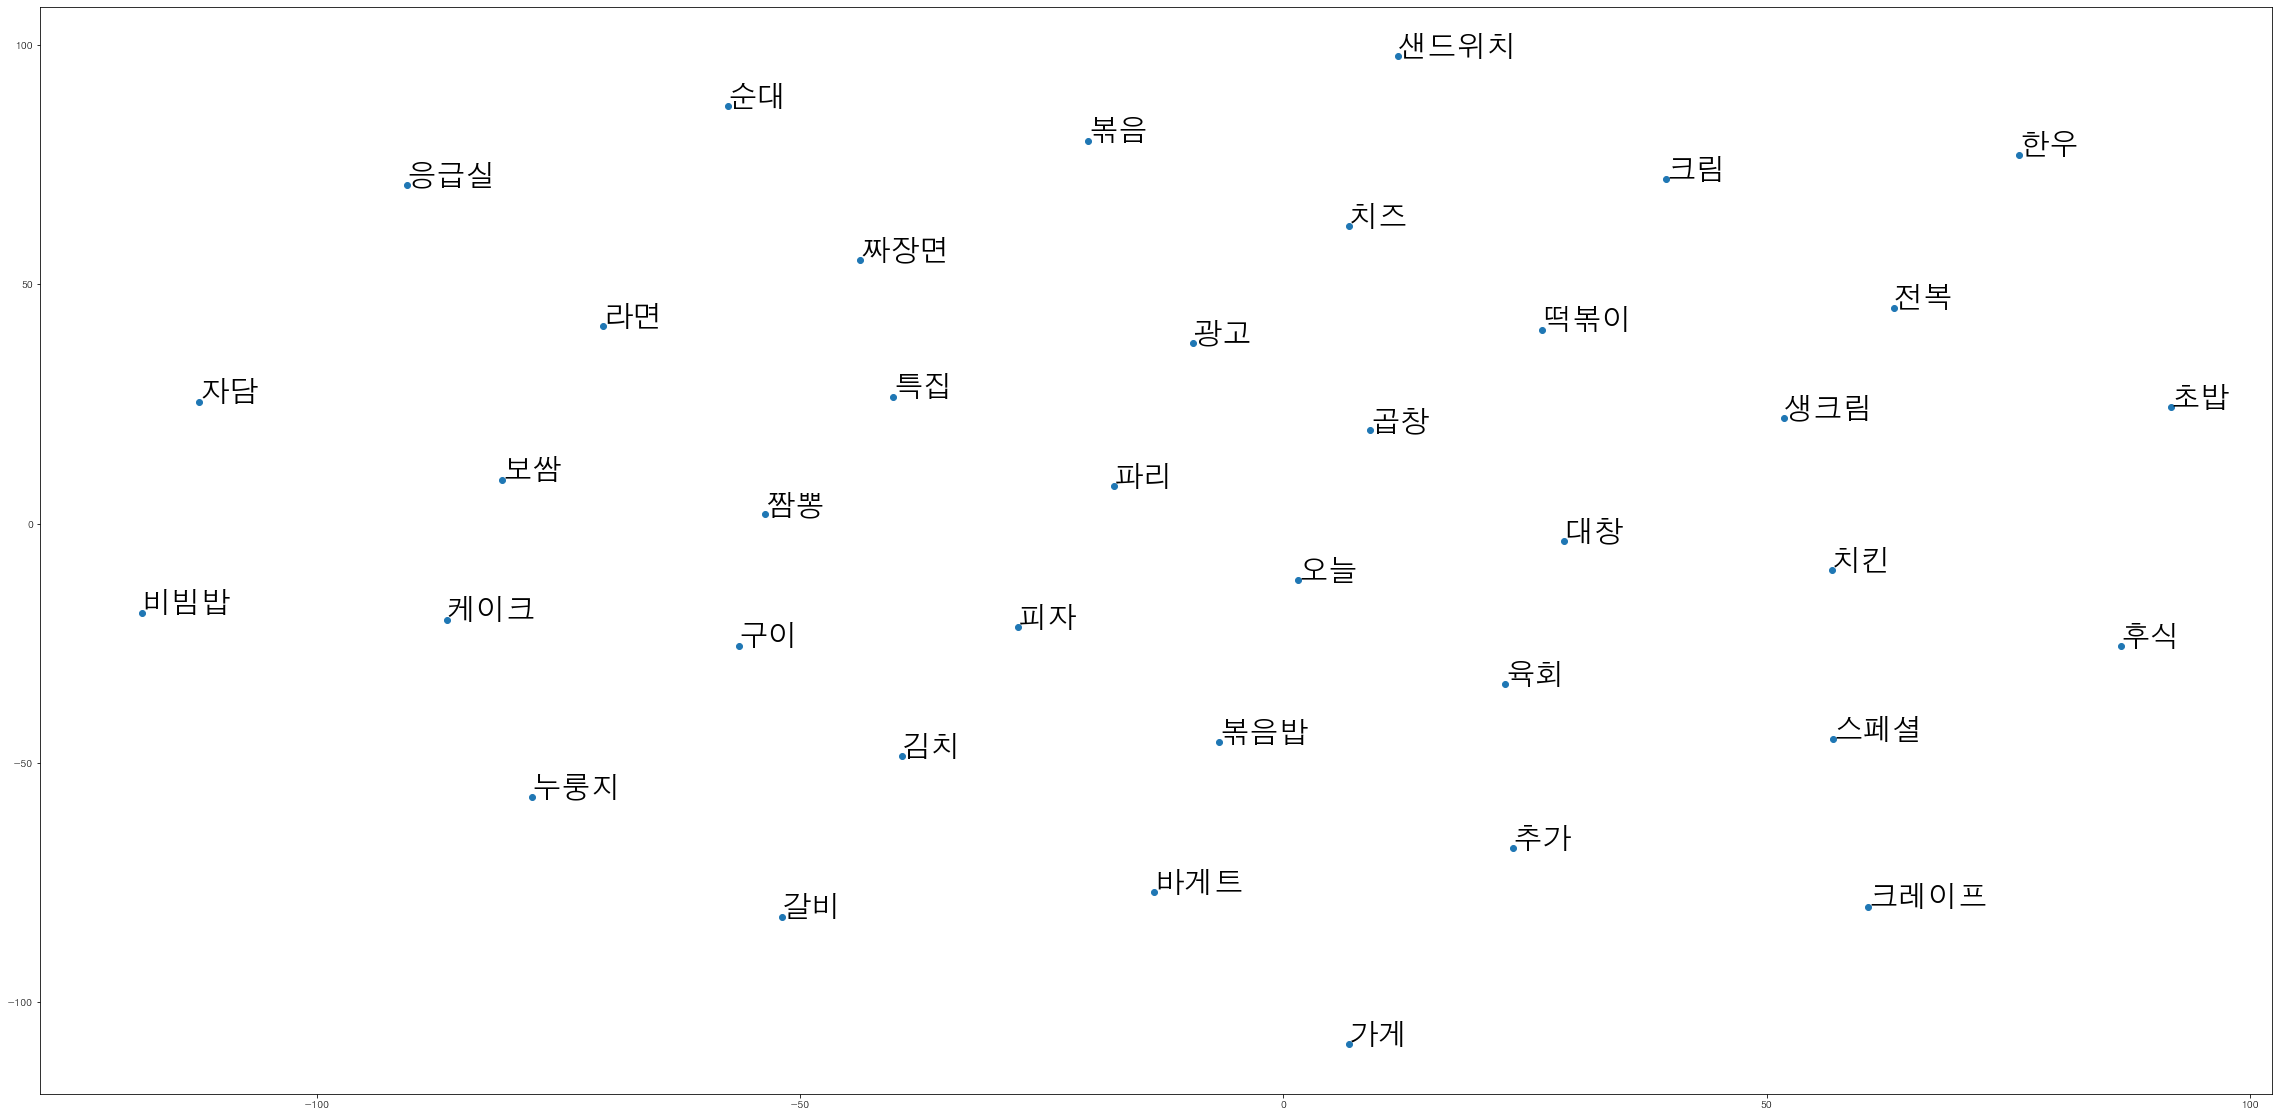

In [30]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=30, fontproperties=prop)
plt.show()